In [1]:
from pyspark import SparkContext, SparkConf
import initspark

In [2]:
conf = SparkConf().setAppName("BabyNames3").setMaster("local")
sc = SparkContext(conf=conf)

In [5]:
rdd = sc\
    .textFile("data/names/StateNames.csv")\
    .map(lambda x: x.split(","))\
    .cache()

In [9]:
rdd.take(4)

[['Id', 'Name', 'Year', 'Gender', 'State', 'Count'],
 ['1', 'Mary', '1910', 'F', 'AK', '14'],
 ['2', 'Annie', '1910', 'F', 'AK', '12'],
 ['3', 'Anna', '1910', 'F', 'AK', '10']]

In [14]:
rdd.filter(lambda x: x[1] == "Kevin").count()

3941

In [16]:
rdd.filter(lambda x: x[1] == "Kevin").filter(lambda x: x[2] == "2000").take(4)

[['23305', 'Kevin', '2000', 'M', 'AK', '21'],
 ['142326', 'Kevin', '2000', 'M', 'AL', '105'],
 ['241207', 'Kevin', '2000', 'M', 'AR', '65'],
 ['341930', 'Kevin', '2000', 'M', 'AZ', '272']]

In [18]:
rdd\
    .filter(lambda x: x[1] == "Kevin")\
    .map(lambda x: (x[2], x[5]))\
    .filter(lambda x: x[0] == "2000")\
    .take(4)

[('2000', '21'), ('2000', '105'), ('2000', '65'), ('2000', '272')]

In [19]:
rddYearAndName = rdd\
    .filter(lambda x: x[1] == "Kevin")\
    .map(lambda x: (x[2], x[5]))


In [20]:
rddYearAndName.take(4)

[('1953', '12'), ('1954', '17'), ('1955', '23'), ('1956', '23')]

In [38]:
results = rddYearAndName.reduceByKey(lambda x, y: int(x) + int(y)).collect()

In [39]:
print(sorted(results))

[('1918', '7'), ('1920', '9'), ('1921', 58), ('1922', 37), ('1923', 29), ('1924', 25), ('1925', 44), ('1926', 22), ('1927', 48), ('1928', 42), ('1929', 53), ('1930', 56), ('1931', 91), ('1932', 97), ('1933', 104), ('1934', 118), ('1935', 135), ('1936', 128), ('1937', 140), ('1938', 211), ('1939', 236), ('1940', 273), ('1941', 373), ('1942', 500), ('1943', 609), ('1944', 546), ('1945', 644), ('1946', 988), ('1947', 1517), ('1948', 2221), ('1949', 3299), ('1950', 4753), ('1951', 6350), ('1952', 7932), ('1953', 10011), ('1954', 15352), ('1955', 17161), ('1956', 21780), ('1957', 24321), ('1958', 24699), ('1959', 26815), ('1960', 28431), ('1961', 28950), ('1962', 28393), ('1963', 30691), ('1964', 29423), ('1965', 28250), ('1966', 25662), ('1967', 24677), ('1968', 23937), ('1969', 23664), ('1970', 27056), ('1971', 24939), ('1972', 22427), ('1973', 20872), ('1974', 19541), ('1975', 18140), ('1976', 18534), ('1977', 22571), ('1978', 20157), ('1979', 18784), ('1980', 18054), ('1981', 17518), ('

### Aufgabe: Zeichne daraus einen Graphen!

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline

In [40]:
results = rddYearAndName.reduceByKey(lambda x, y: int(x) + int(y)).collect()

In [42]:
results = sorted(results)

In [45]:
x = []
y = []

for result in results:
    x.append(result[0])
    y.append(result[1])

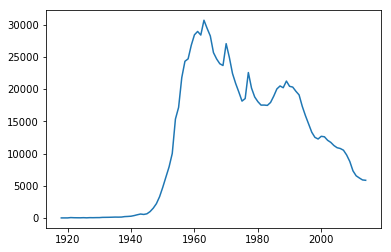

In [48]:
plt.plot(x, y)
plt.show()